# HOMEWORK7-TEXT CLASSIFICATION

Text classification is the process of automatically classifying textual data according to its content into pre-established groups or classes.

In [5]:
#importing pandas
import pandas as pd
# Read data into df
df = pd.read_csv("C:/Users/abhil/Downloads/archive (18)/TheSocialDilemma.csv")
# Print head
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,Sentiment
0,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:55:33,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
1,Mari Smith,"San Diego, California",Premier Facebook Marketing Expert | Social Med...,2007-09-11 22:22:51,579942,288625,11610,False,2020-09-16 20:53:17,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,NaN,Twitter Web App,False,Neutral
2,Varun Tyagi,"Goa, India",Indian | Tech Solution Artist & Hospitality Ex...,2009-09-06 10:36:01,257,204,475,False,2020-09-16 20:51:57,Go watch “The Social Dilemma” on Netflix!\n\nI...,NaN,Twitter for iPhone,False,Positive
3,Casey Conway,"Sydney, New South Wales",Head of Diversity & Inclusion @RugbyAU | It's ...,2012-12-28 21:45:06,11782,1033,12219,True,2020-09-16 20:51:46,I watched #TheSocialDilemma last night. I’m sc...,['TheSocialDilemma'],Twitter for iPhone,False,Negative
4,Charlotte Paul,Darlington,Instagram Charlottejyates,2012-05-28 20:43:08,278,387,5850,False,2020-09-16 20:51:11,The problem of me being on my phone most the t...,['TheSocialDilemma'],Twitter for iPhone,False,Positive


## BAR CHART

<Axes: xlabel='Sentiment'>

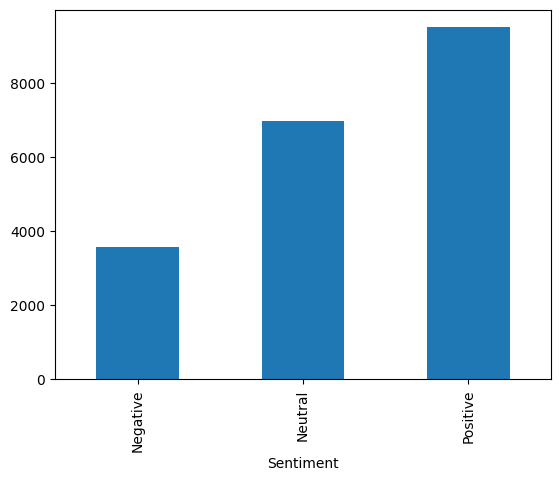

In [6]:
# Plot the bar chart
df['Sentiment'].value_counts().sort_index().plot(kind='bar')

## BAR PLOT

<Axes: xlabel='user_verified'>

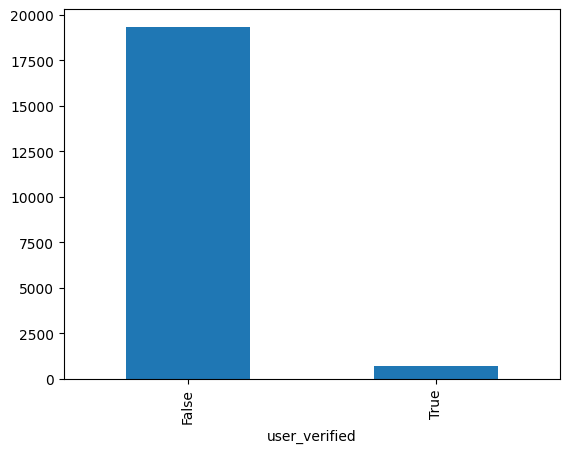

In [7]:
# Plot the bar chart
df['user_verified'].value_counts().sort_index().plot(kind='bar')

## FUNCTION TO REMOVE ODD WORDS

Words that are unusual or uncommon in a certain context are referred to as odd words. When compared to other terms in the text, these words are uncommon.Odd word removal from text data can help with enhanced interpretability, improved generalization, dimension reduction, and noise reduction.

In [8]:
#importing html and regex
import html
import re
def clean(text):
    # convert html escapes like & to characters.
    text = html.unescape(text) 
    # tags like 
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches  but not #cool
    text = re.sub(r'(?:^|\s)[<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

## DATA CLEANING

The process of turning unstructured data into a clean, organized format that may be used for analysis or other tasks later on is known as data cleaning. It entails locating and fixing data mistakes, inconsistencies, and inaccuracies.

In [11]:
# Selecting only the 'user_description' and 'text','Sentiment' columns
df = df[['user_description', 'text', 'Sentiment']]

# Dropping rows with NaN values
df = df.dropna()

# Combining the 'user_description' and 'text' columns into a single 'title' column
df['title'] = df['text'] + ' ' + df['user_description']

# Dropping the 'user_description' and 'text' columns after combining them into 'title'
df = df.drop(columns=['user_description', 'text'])

# Applying the clean function (assuming you have defined it somewhere)
df['title'] = df['title'].apply(clean)

# Filtering out rows where the length of 'title' is less than 50
df = df[df['title'].str.len() > 50]

# Displaying a sample of the resulting DataFrame
df.sample(2)

,Sentiment,title
2818,Neutral,Sweeping internal Facebook memo: “I have blood...
16634,Neutral,Netflix showing you “Recommended Shows” after ...


## TRAIN TEST AND SPLIT

In [12]:
#Importing train_test_split from scikit-learn's model_selection module
from sklearn.model_selection import train_test_split

#Splitting the 'title' column (features) and the 'Sentiment' column (target) 
X_train, X_test, Y_train, Y_test = train_test_split(df['title'],
                                                    df['Sentiment'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['Sentiment'])

#Printing the sizes of the training and testing data
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

Size of Training Data  14902
Size of Test Data  3726


## TRAINING MODEL USIN SVM

In [13]:
#importing functions and classes from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
#Creating an instance of TfidfVectorizer with specified parameters
tfidf = TfidfVectorizer(min_df = 10, ngram_range=(1,2), stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)
X_test_tf = tfidf.transform(X_test)

## BUILDING THE MODEL

In [14]:
#Importing the LinearSVC class from the sklearn.svm module
from sklearn.svm import LinearSVC

model1 = LinearSVC(random_state=0, tol=1e-5)
model1.fit(X_train_tf, Y_train)

C:\Users\abhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC(random_state=0, tol=1e-05)

## TESTING AND ACCURACY OF THE MODEL

In [15]:
#Importing the accuracy_score function from the sklearn.metrics module
from sklearn.metrics import accuracy_score

Y_pred = model1.predict(X_test_tf)
print ('Accuracy Score : ', accuracy_score(Y_test, Y_pred))

Accuracy Score :  0.7361782071927


## DUMMY CLASSIFIER

In machine learning, a dummy classifier is a baseline classifier that is kept basic and used for comparison.A dummy classifier, in contrast to traditional classifiers, uses basic rules unrelated to the real data to create predictions.

In [16]:
#importing the DummyClassifier class from the sklearn.dummy module
from sklearn.dummy import DummyClassifier
#initializing and Training the Dummy Classifier
clf = DummyClassifier(strategy='most_frequent', random_state=42)
clf.fit(X_train, Y_train)
Y_pred_baseline = clf.predict(X_test)
print ('Accuracy Score : ', accuracy_score(Y_test, Y_pred_baseline))

Accuracy Score :  0.4758454106280193


##  CONFUSION MATRIX

A table that is frequently used to assess how well a classification model is performing is called a confusion matrix. By comparing the number of accurate and inaccurate predictions for each class to the actual class labels in the dataset, it provides an overview of how well a classification method performed.

In [17]:
from sklearn.metrics import confusion_matrix

# Assuming  Y_test and Y_pred defined
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)

from sklearn.metrics import confusion_matrix
Y_pred = model1.predict(X_test_tf)
confusion_matrix(Y_test, Y_pred)

[[ 344  148  171]
 [  67  978  245]
 [  90  262 1421]]


array([[ 344,  148,  171],
       [  67,  978,  245],
       [  90,  262, 1421]], dtype=int64)

## PLOTTING CONFUSION MATRIX

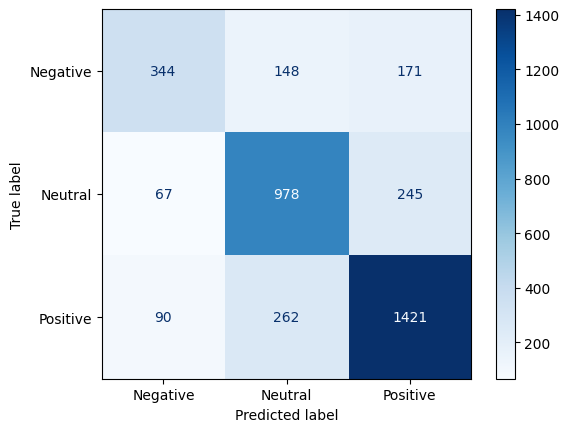

In [18]:
#importing ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Get the predicted labels
predicted_labels = model1.predict(X_test_tf)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, predicted_labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model1.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()

## CLASSIFICATION REPORT

In [19]:
#importing the Classification Report Function
from sklearn.metrics import classification_report
#classification_report function to generate a text report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

    Negative       0.69      0.52      0.59       663
     Neutral       0.70      0.76      0.73      1290
    Positive       0.77      0.80      0.79      1773

    accuracy                           0.74      3726
   macro avg       0.72      0.69      0.70      3726
weighted avg       0.73      0.74      0.73      3726



## DOWNSAMPLING

In [22]:
# Filter bug reports with sentiment Positive and sample 4000 rows from it
df_sampleP3 = df[df['Sentiment'] == 'Positive'].sample(n=4000, random_state=123)

# Create a separate dataframe containing all other bug reports
df_sampleRest = df[df['Sentiment'] != 'Positive']

# Concatenate the two dataframes to create the new balanced bug reports dataset
df_balanced = pd.concat([df_sampleRest, df_sampleP3])

# Check the status of the class imbalance
df_balanced['Sentiment'].value_counts()

Sentiment
Neutral     6449
Positive    4000
Negative    3316
Name: count, dtype: int64

## REPEATING EVERYTHING

In [23]:
# Loading the balanced dataframe

df = df_balanced[['title', 'Sentiment']]
df = df.dropna()

# Step 1 - Data Preparation

df['title'] = df['title'].apply(clean)

# Step 2 - Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(df['title'],
                                                    df['Sentiment'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['Sentiment'])
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])

# Step 3 - Training the Machine Learning model

tfidf = TfidfVectorizer(min_df=10, ngram_range=(1, 2), stop_words="english")
X_train_tf = tfidf.fit_transform(X_train)

model1 = LinearSVC(random_state=0, tol=1e-5)
model1.fit(X_train_tf, Y_train)
# Step 4 - Model Evaluation

X_test_tf = tfidf.transform(X_test)
Y_pred = model1.predict(X_test_tf)
print('Accuracy Score : ', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Size of Training Data  11012
Size of Test Data  2753


C:\Users\abhil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy Score :  0.7290228841264076
              precision    recall  f1-score   support

    Negative       0.69      0.57      0.62       663
     Neutral       0.76      0.84      0.80      1290
    Positive       0.71      0.67      0.69       800

    accuracy                           0.73      2753
   macro avg       0.72      0.70      0.70      2753
weighted avg       0.73      0.73      0.72      2753



## GRID SEARCH, SVM NOT LINEARSVM

In [ ]:
#importing Pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
# Flag that determines the choice of SVC (True) and LinearSVC (False)
runSVC = True
# Loading the dataframe
df = pd.read_csv("C:/Users/abhil/Downloads/archive (18)/TheSocialDilemma.csv")
#df = df.drop(columns=['Duplicated_issue'])
df = df[['text', 'user_description', 'Sentiment']]
df = df.dropna()
df['title'] = df['text'] + df['user_description']
df = df.drop(columns=['text', 'user_description'])
# Step 1 - Data Preparation
df['title'] = df['title'].apply(clean)
df = df[df['title'].str.len() > 50]
if (runSVC):
    # Sample the data when running SVC to ensure reasonable run-times
    df = df.groupby('Sentiment', as_index=False).apply(pd.DataFrame.sample,
                                                       random_state=42,
                                                       frac=.2)
# Step 2 - Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(df['title'],
                                                    df['Sentiment'],
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['Sentiment'])
print('Size of Training Data ', X_train.shape[0])
print('Size of Test Data ', X_test.shape[0])
# Step 3 - Training the Machine Learning model
tfidf = TfidfVectorizer(stop_words="english")
if (runSVC):
    model = SVC(random_state=42, probability=True)
    grid_param = [{
        'tfidf__min_df': [5, 10],
        'tfidf__ngram_range': [(1, 3), (1, 6)],
        'model__C': [1, 100],
        'model__kernel': ['linear']
    }]
else:
    model = LinearSVC(random_state=42, tol=1e-5)
    grid_param = {
        'tfidf__min_df': [5, 10],
        'tfidf__ngram_range': [(1, 3), (1, 6)],
        'model__C': [1, 100],
        'model__loss': ['hinge']
    }
training_pipeline = Pipeline(
    steps=[('tfidf', TfidfVectorizer(stop_words="english")), ('model', model)])
gridSearchProcessor = GridSearchCV(estimator=training_pipeline,
                                   param_grid=grid_param,
                                   cv=5)
gridSearchProcessor.fit(X_train, Y_train)
best_params = gridSearchProcessor.best_params_
print("Best alpha parameter identified by grid search ", best_params)
best_result = gridSearchProcessor.best_score_
print("Best result identified by grid search ", best_result)

best_model = gridSearchProcessor.best_estimator_

# Step 4 - Model Evaluation

Y_pred = best_model.predict(X_test)
print('Accuracy Score - ', accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

C:\Users\abhil\AppData\Local\Temp\ipykernel_9524\3558539421.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Sentiment', as_index=False).apply(pd.DataFrame.sample,


Size of Training Data  2980
Size of Test Data  745
